<a href="https://colab.research.google.com/github/datasciencedecoded/Data-Science-Decoded-Notebooks/blob/main/Time_Series_Forecasting_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-10-5a79460eef28>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['ds'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M') # Add a date column
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:384: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)
/usr/local/lib/python3.11/dist-packages/utilsforecast/processing.py:440: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  freq = pd.tseries.frequencies.to_offset(freq)


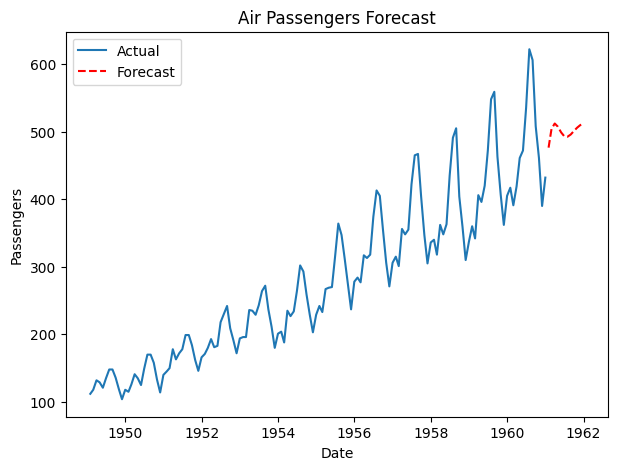

In [10]:
# Install libraries
!pip install statsforecast

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsforecast.models import AutoARIMA
from statsforecast import StatsForecast
from statsforecast.utils import AirPassengers

# Load AirPassengers dataset
df = AirPassengers.copy()
# Convert the NumPy array to a pandas DataFrame with appropriate columns
df = pd.DataFrame(df, columns=['y'])
df['ds'] = pd.date_range(start='1949-01-01', periods=len(df), freq='M') # Add a date column
# Add a unique_id column, necessary for statsforecast
df['unique_id'] = 'AirPassengers' # Assuming you have a single time series

# Train AutoARIMA model
sf = StatsForecast(models=[AutoARIMA()], freq='M')
forecast_df = sf.forecast(df=df, h=12)

# Plot results
plt.figure(figsize=(7, 5))
plt.plot(df['ds'], df['y'], label='Actual')
plt.plot(forecast_df['ds'], forecast_df['AutoARIMA'], label='Forecast', linestyle='dashed', color='red')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.title('Air Passengers Forecast')
plt.show()